# GAN для генерации рукописных цифр (MNIST) с использованием PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
NOISE_DIM = 100
NUM_CLASSES = 10 
IMAGE_SIZE = 28
BATCH_SIZE = 64
NUM_EPOCHS = 50
LR = 0.0002
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:

class Generator(nn.Module):
    def __init__(self, noise_dim, num_classes):
        super(Generator, self).__init__()
        self.noise_dim = noise_dim
        self.num_classes = num_classes

        self.label_emb = nn.Embedding(num_classes, num_classes) 

        self.main = nn.Sequential(
            nn.Linear(noise_dim + num_classes, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, IMAGE_SIZE * IMAGE_SIZE),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_embedding = self.label_emb(labels)
        x = torch.cat([noise, label_embedding], dim=1)
        return self.main(x).view(-1, 1, IMAGE_SIZE, IMAGE_SIZE)

In [4]:
class Discriminator(nn.Module):
    def __init__(self, num_classes):
        super(Discriminator, self).__init__()
        self.num_classes = num_classes

        self.label_emb = nn.Embedding(num_classes, IMAGE_SIZE * IMAGE_SIZE)

        self.main = nn.Sequential(
            nn.Linear(IMAGE_SIZE * IMAGE_SIZE + IMAGE_SIZE * IMAGE_SIZE, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )

    def forward(self, images, labels):
        batch_size = images.size(0)
        flat_images = images.view(batch_size, -1)
        label_embedding = self.label_emb(labels).view(batch_size, -1)
        x = torch.cat([flat_images, label_embedding], dim=1)
        return self.main(x)

In [5]:
generator = Generator(NOISE_DIM, NUM_CLASSES).to(DEVICE)
discriminator = Discriminator(NUM_CLASSES).to(DEVICE)

g_optimizer = optim.Adam(generator.parameters(), lr=LR, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=LR, betas=(0.5, 0.999))

criterion = nn.BCEWithLogitsLoss()

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.02MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 125kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.32MB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


In [7]:
def show_images(images, epoch, nrow=4, title="Generated Images"):
    images = images.view(images.size(0), 1, IMAGE_SIZE, IMAGE_SIZE)
    grid = torchvision.utils.make_grid(images, nrow=nrow, padding=2, normalize=True)
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap='gray')
    plt.axis('off')
    plt.savefig(f'cgan_epoch_{epoch+1:03d}.png')
    plt.show()

[Epoch 1/50] [Batch 1/938] [D loss: 1.3707] [G loss: 0.7201]
[Epoch 1/50] [Batch 101/938] [D loss: 1.2624] [G loss: 1.6338]
[Epoch 1/50] [Batch 201/938] [D loss: 1.1464] [G loss: 1.2105]
[Epoch 1/50] [Batch 301/938] [D loss: 1.2166] [G loss: 0.9346]
[Epoch 1/50] [Batch 401/938] [D loss: 1.3161] [G loss: 1.1199]
[Epoch 1/50] [Batch 501/938] [D loss: 1.2411] [G loss: 0.9846]
[Epoch 1/50] [Batch 601/938] [D loss: 1.2337] [G loss: 0.9140]
[Epoch 1/50] [Batch 701/938] [D loss: 1.3162] [G loss: 1.1301]
[Epoch 1/50] [Batch 801/938] [D loss: 1.3805] [G loss: 0.7249]
[Epoch 1/50] [Batch 901/938] [D loss: 1.3754] [G loss: 0.7971]


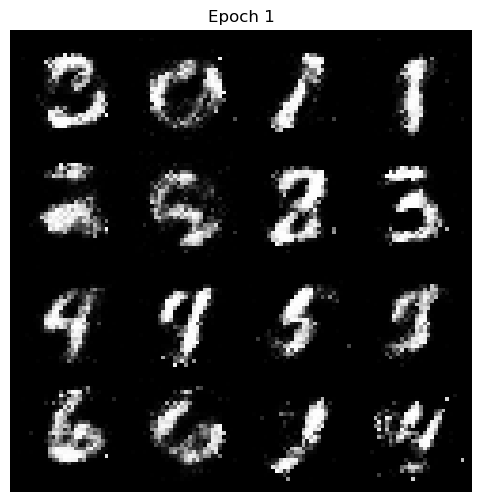

[Epoch 2/50] [Batch 1/938] [D loss: 1.3341] [G loss: 0.8382]
[Epoch 2/50] [Batch 101/938] [D loss: 1.2158] [G loss: 1.0450]
[Epoch 2/50] [Batch 201/938] [D loss: 1.2812] [G loss: 0.8471]
[Epoch 2/50] [Batch 301/938] [D loss: 1.2856] [G loss: 0.7772]
[Epoch 2/50] [Batch 401/938] [D loss: 1.2226] [G loss: 1.0175]
[Epoch 2/50] [Batch 501/938] [D loss: 1.3159] [G loss: 1.2177]
[Epoch 2/50] [Batch 601/938] [D loss: 1.2131] [G loss: 1.1317]
[Epoch 2/50] [Batch 701/938] [D loss: 1.2645] [G loss: 0.7950]
[Epoch 2/50] [Batch 801/938] [D loss: 1.3070] [G loss: 1.0973]
[Epoch 2/50] [Batch 901/938] [D loss: 1.3003] [G loss: 0.8817]
[Epoch 3/50] [Batch 1/938] [D loss: 1.2628] [G loss: 0.8069]
[Epoch 3/50] [Batch 101/938] [D loss: 1.3610] [G loss: 0.9838]
[Epoch 3/50] [Batch 201/938] [D loss: 1.2918] [G loss: 0.8892]
[Epoch 3/50] [Batch 301/938] [D loss: 1.2972] [G loss: 0.9515]
[Epoch 3/50] [Batch 401/938] [D loss: 1.2888] [G loss: 0.8947]
[Epoch 3/50] [Batch 501/938] [D loss: 1.2500] [G loss: 0.87

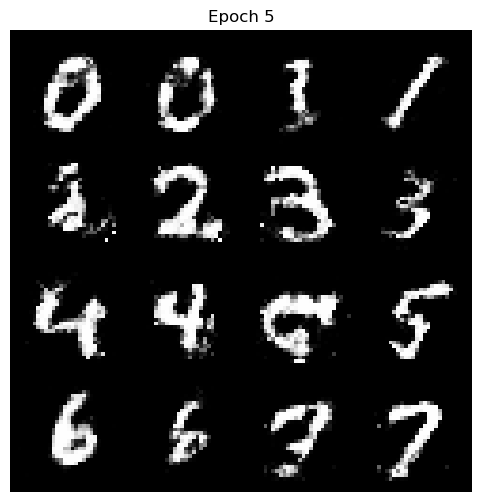

[Epoch 6/50] [Batch 1/938] [D loss: 1.3031] [G loss: 0.8357]
[Epoch 6/50] [Batch 101/938] [D loss: 1.3043] [G loss: 0.8894]
[Epoch 6/50] [Batch 201/938] [D loss: 1.3146] [G loss: 0.8947]
[Epoch 6/50] [Batch 301/938] [D loss: 1.3388] [G loss: 0.7746]
[Epoch 6/50] [Batch 401/938] [D loss: 1.2816] [G loss: 0.8920]
[Epoch 6/50] [Batch 501/938] [D loss: 1.2780] [G loss: 0.9393]
[Epoch 6/50] [Batch 601/938] [D loss: 1.2767] [G loss: 0.8430]
[Epoch 6/50] [Batch 701/938] [D loss: 1.3088] [G loss: 0.7805]
[Epoch 6/50] [Batch 801/938] [D loss: 1.3301] [G loss: 0.8534]
[Epoch 6/50] [Batch 901/938] [D loss: 1.3946] [G loss: 0.7984]
[Epoch 7/50] [Batch 1/938] [D loss: 1.3080] [G loss: 0.8606]
[Epoch 7/50] [Batch 101/938] [D loss: 1.3541] [G loss: 0.8795]
[Epoch 7/50] [Batch 201/938] [D loss: 1.3346] [G loss: 0.8706]
[Epoch 7/50] [Batch 301/938] [D loss: 1.3324] [G loss: 0.8950]
[Epoch 7/50] [Batch 401/938] [D loss: 1.2692] [G loss: 0.9900]
[Epoch 7/50] [Batch 501/938] [D loss: 1.3366] [G loss: 0.94

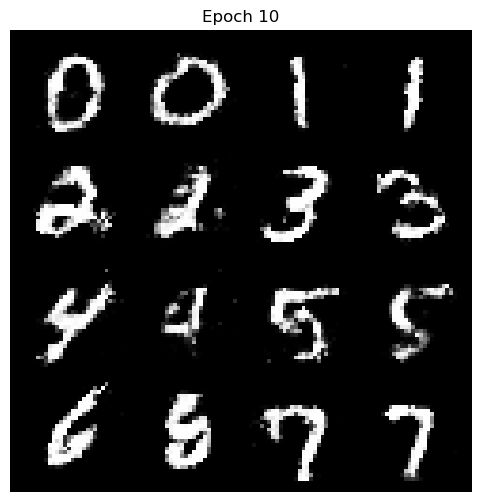

[Epoch 11/50] [Batch 1/938] [D loss: 1.3475] [G loss: 0.8463]
[Epoch 11/50] [Batch 101/938] [D loss: 1.3045] [G loss: 0.8512]
[Epoch 11/50] [Batch 201/938] [D loss: 1.2267] [G loss: 0.8896]
[Epoch 11/50] [Batch 301/938] [D loss: 1.4197] [G loss: 0.8143]
[Epoch 11/50] [Batch 401/938] [D loss: 1.2856] [G loss: 0.9012]
[Epoch 11/50] [Batch 501/938] [D loss: 1.3223] [G loss: 0.7723]
[Epoch 11/50] [Batch 601/938] [D loss: 1.3226] [G loss: 0.9241]
[Epoch 11/50] [Batch 701/938] [D loss: 1.3561] [G loss: 0.8153]
[Epoch 11/50] [Batch 801/938] [D loss: 1.3116] [G loss: 0.8253]
[Epoch 11/50] [Batch 901/938] [D loss: 1.3223] [G loss: 0.8173]
[Epoch 12/50] [Batch 1/938] [D loss: 1.4124] [G loss: 0.8766]
[Epoch 12/50] [Batch 101/938] [D loss: 1.3565] [G loss: 0.8503]
[Epoch 12/50] [Batch 201/938] [D loss: 1.3653] [G loss: 0.8340]
[Epoch 12/50] [Batch 301/938] [D loss: 1.3304] [G loss: 0.8128]
[Epoch 12/50] [Batch 401/938] [D loss: 1.2850] [G loss: 0.8316]
[Epoch 12/50] [Batch 501/938] [D loss: 1.356

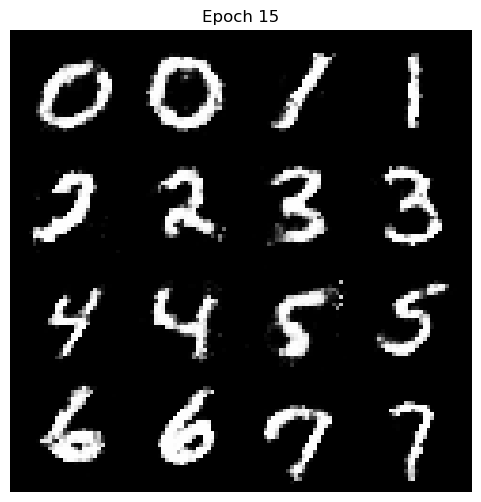

[Epoch 16/50] [Batch 1/938] [D loss: 1.3232] [G loss: 0.8294]
[Epoch 16/50] [Batch 101/938] [D loss: 1.3284] [G loss: 0.8609]
[Epoch 16/50] [Batch 201/938] [D loss: 1.2988] [G loss: 0.8213]
[Epoch 16/50] [Batch 301/938] [D loss: 1.3558] [G loss: 0.7899]
[Epoch 16/50] [Batch 401/938] [D loss: 1.3320] [G loss: 0.8363]
[Epoch 16/50] [Batch 501/938] [D loss: 1.3133] [G loss: 0.7673]
[Epoch 16/50] [Batch 601/938] [D loss: 1.3297] [G loss: 0.9097]
[Epoch 16/50] [Batch 701/938] [D loss: 1.3458] [G loss: 0.8011]
[Epoch 16/50] [Batch 801/938] [D loss: 1.3649] [G loss: 0.7884]
[Epoch 16/50] [Batch 901/938] [D loss: 1.3435] [G loss: 0.7976]
[Epoch 17/50] [Batch 1/938] [D loss: 1.3113] [G loss: 0.8396]
[Epoch 17/50] [Batch 101/938] [D loss: 1.3369] [G loss: 0.8492]
[Epoch 17/50] [Batch 201/938] [D loss: 1.3161] [G loss: 0.8387]
[Epoch 17/50] [Batch 301/938] [D loss: 1.3455] [G loss: 0.8323]
[Epoch 17/50] [Batch 401/938] [D loss: 1.3635] [G loss: 0.8190]
[Epoch 17/50] [Batch 501/938] [D loss: 1.361

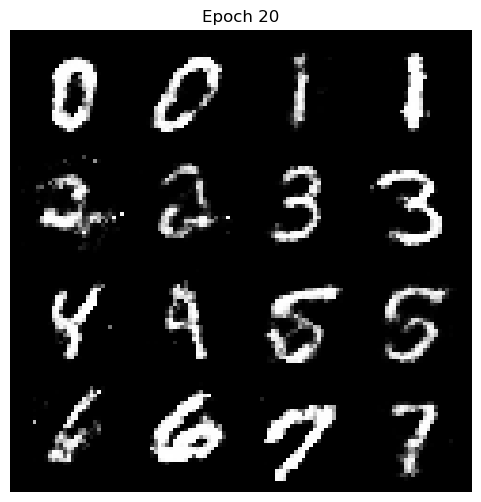

[Epoch 21/50] [Batch 1/938] [D loss: 1.2900] [G loss: 0.8586]
[Epoch 21/50] [Batch 101/938] [D loss: 1.3141] [G loss: 0.8066]
[Epoch 21/50] [Batch 201/938] [D loss: 1.4052] [G loss: 0.7481]
[Epoch 21/50] [Batch 301/938] [D loss: 1.3953] [G loss: 0.8340]
[Epoch 21/50] [Batch 401/938] [D loss: 1.3568] [G loss: 0.8524]
[Epoch 21/50] [Batch 501/938] [D loss: 1.2971] [G loss: 0.8173]
[Epoch 21/50] [Batch 601/938] [D loss: 1.2884] [G loss: 0.7931]
[Epoch 21/50] [Batch 701/938] [D loss: 1.3658] [G loss: 0.8273]
[Epoch 21/50] [Batch 801/938] [D loss: 1.2648] [G loss: 0.8966]
[Epoch 21/50] [Batch 901/938] [D loss: 1.3649] [G loss: 0.7860]
[Epoch 22/50] [Batch 1/938] [D loss: 1.4208] [G loss: 0.8111]
[Epoch 22/50] [Batch 101/938] [D loss: 1.3513] [G loss: 0.7734]
[Epoch 22/50] [Batch 201/938] [D loss: 1.3203] [G loss: 0.8149]
[Epoch 22/50] [Batch 301/938] [D loss: 1.3258] [G loss: 0.8393]
[Epoch 22/50] [Batch 401/938] [D loss: 1.3116] [G loss: 0.7696]
[Epoch 22/50] [Batch 501/938] [D loss: 1.383

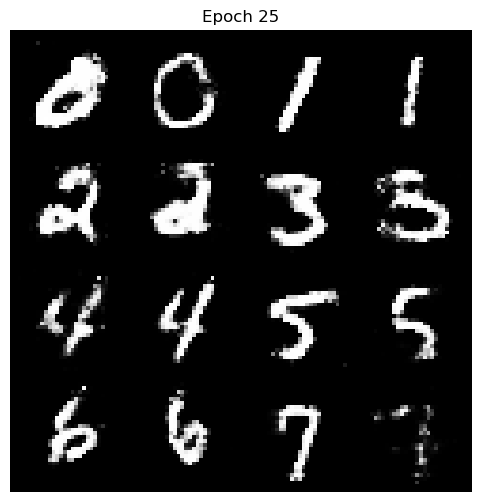

[Epoch 26/50] [Batch 1/938] [D loss: 1.3249] [G loss: 0.8115]
[Epoch 26/50] [Batch 101/938] [D loss: 1.3760] [G loss: 0.7946]
[Epoch 26/50] [Batch 201/938] [D loss: 1.3288] [G loss: 0.7839]
[Epoch 26/50] [Batch 301/938] [D loss: 1.3556] [G loss: 0.8015]
[Epoch 26/50] [Batch 401/938] [D loss: 1.4305] [G loss: 0.7740]
[Epoch 26/50] [Batch 501/938] [D loss: 1.3140] [G loss: 0.8090]
[Epoch 26/50] [Batch 601/938] [D loss: 1.3160] [G loss: 0.8432]
[Epoch 26/50] [Batch 701/938] [D loss: 1.3678] [G loss: 0.8506]
[Epoch 26/50] [Batch 801/938] [D loss: 1.3610] [G loss: 0.8077]
[Epoch 26/50] [Batch 901/938] [D loss: 1.3169] [G loss: 0.8300]
[Epoch 27/50] [Batch 1/938] [D loss: 1.3468] [G loss: 0.7909]
[Epoch 27/50] [Batch 101/938] [D loss: 1.3589] [G loss: 0.7819]
[Epoch 27/50] [Batch 201/938] [D loss: 1.3430] [G loss: 0.7616]
[Epoch 27/50] [Batch 301/938] [D loss: 1.4177] [G loss: 0.7896]
[Epoch 27/50] [Batch 401/938] [D loss: 1.3211] [G loss: 0.8185]
[Epoch 27/50] [Batch 501/938] [D loss: 1.372

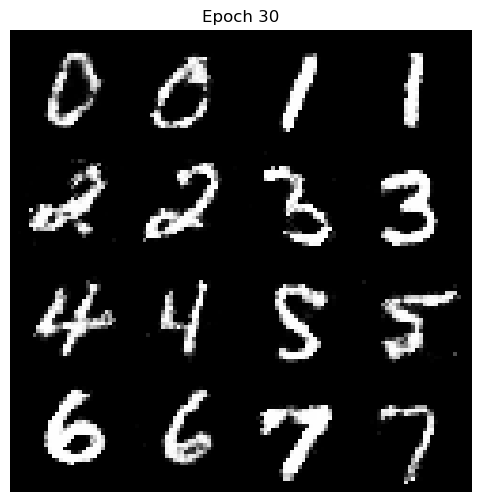

[Epoch 31/50] [Batch 1/938] [D loss: 1.3662] [G loss: 0.8132]
[Epoch 31/50] [Batch 101/938] [D loss: 1.3640] [G loss: 0.7624]
[Epoch 31/50] [Batch 201/938] [D loss: 1.3497] [G loss: 0.8155]
[Epoch 31/50] [Batch 301/938] [D loss: 1.3239] [G loss: 0.8159]
[Epoch 31/50] [Batch 401/938] [D loss: 1.3448] [G loss: 0.8195]
[Epoch 31/50] [Batch 501/938] [D loss: 1.3498] [G loss: 0.7903]
[Epoch 31/50] [Batch 601/938] [D loss: 1.3334] [G loss: 0.8337]
[Epoch 31/50] [Batch 701/938] [D loss: 1.3763] [G loss: 0.7890]
[Epoch 31/50] [Batch 801/938] [D loss: 1.3017] [G loss: 0.8328]
[Epoch 31/50] [Batch 901/938] [D loss: 1.3630] [G loss: 0.7665]
[Epoch 32/50] [Batch 1/938] [D loss: 1.3769] [G loss: 0.7583]
[Epoch 32/50] [Batch 101/938] [D loss: 1.3743] [G loss: 0.8116]
[Epoch 32/50] [Batch 201/938] [D loss: 1.2812] [G loss: 0.8100]
[Epoch 32/50] [Batch 301/938] [D loss: 1.3297] [G loss: 0.8037]
[Epoch 32/50] [Batch 401/938] [D loss: 1.4138] [G loss: 0.8311]
[Epoch 32/50] [Batch 501/938] [D loss: 1.394

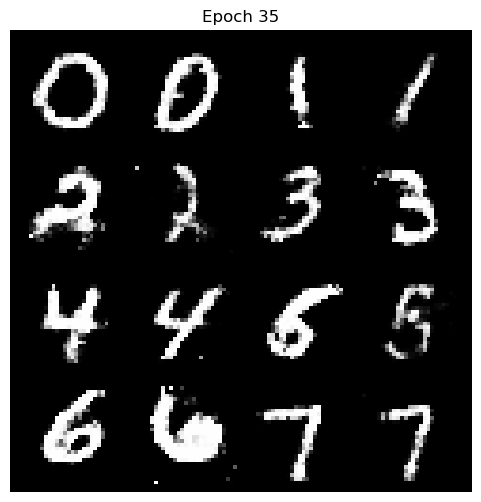

[Epoch 36/50] [Batch 1/938] [D loss: 1.3080] [G loss: 0.8296]
[Epoch 36/50] [Batch 101/938] [D loss: 1.3158] [G loss: 0.8576]
[Epoch 36/50] [Batch 201/938] [D loss: 1.3308] [G loss: 0.8460]
[Epoch 36/50] [Batch 301/938] [D loss: 1.3212] [G loss: 0.7887]
[Epoch 36/50] [Batch 401/938] [D loss: 1.3064] [G loss: 0.7914]
[Epoch 36/50] [Batch 501/938] [D loss: 1.4123] [G loss: 0.8288]
[Epoch 36/50] [Batch 601/938] [D loss: 1.3526] [G loss: 0.7995]
[Epoch 36/50] [Batch 701/938] [D loss: 1.3457] [G loss: 0.7715]
[Epoch 36/50] [Batch 801/938] [D loss: 1.3480] [G loss: 0.7536]
[Epoch 36/50] [Batch 901/938] [D loss: 1.4074] [G loss: 0.7832]
[Epoch 37/50] [Batch 1/938] [D loss: 1.3647] [G loss: 0.7744]
[Epoch 37/50] [Batch 101/938] [D loss: 1.3627] [G loss: 0.8130]
[Epoch 37/50] [Batch 201/938] [D loss: 1.3972] [G loss: 0.8087]
[Epoch 37/50] [Batch 301/938] [D loss: 1.3891] [G loss: 0.8032]
[Epoch 37/50] [Batch 401/938] [D loss: 1.3540] [G loss: 0.7979]
[Epoch 37/50] [Batch 501/938] [D loss: 1.348

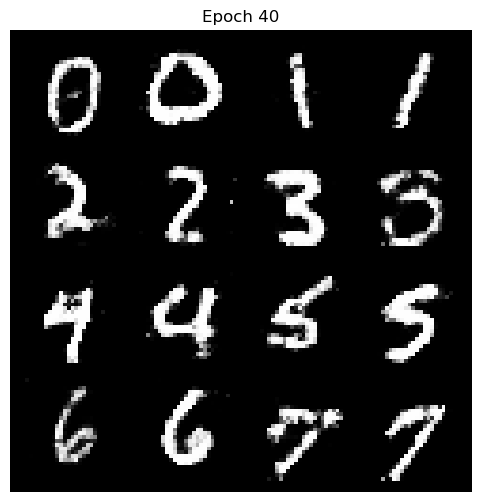

[Epoch 41/50] [Batch 1/938] [D loss: 1.2835] [G loss: 0.8099]
[Epoch 41/50] [Batch 101/938] [D loss: 1.3431] [G loss: 0.8416]
[Epoch 41/50] [Batch 201/938] [D loss: 1.3546] [G loss: 0.7862]
[Epoch 41/50] [Batch 301/938] [D loss: 1.3144] [G loss: 0.8474]
[Epoch 41/50] [Batch 401/938] [D loss: 1.3457] [G loss: 0.7913]
[Epoch 41/50] [Batch 501/938] [D loss: 1.3478] [G loss: 0.8045]
[Epoch 41/50] [Batch 601/938] [D loss: 1.3634] [G loss: 0.7349]
[Epoch 41/50] [Batch 701/938] [D loss: 1.3891] [G loss: 0.7681]
[Epoch 41/50] [Batch 801/938] [D loss: 1.3435] [G loss: 0.7595]
[Epoch 41/50] [Batch 901/938] [D loss: 1.3604] [G loss: 0.7875]
[Epoch 42/50] [Batch 1/938] [D loss: 1.2963] [G loss: 0.8439]
[Epoch 42/50] [Batch 101/938] [D loss: 1.3746] [G loss: 0.7759]
[Epoch 42/50] [Batch 201/938] [D loss: 1.3764] [G loss: 0.8130]
[Epoch 42/50] [Batch 301/938] [D loss: 1.3361] [G loss: 0.7929]
[Epoch 42/50] [Batch 401/938] [D loss: 1.3846] [G loss: 0.7795]
[Epoch 42/50] [Batch 501/938] [D loss: 1.372

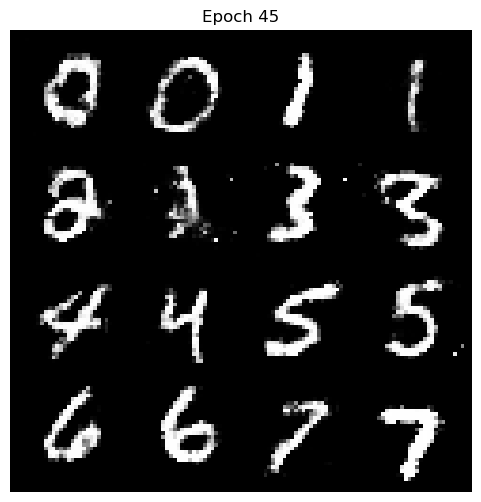

[Epoch 46/50] [Batch 1/938] [D loss: 1.4517] [G loss: 0.7459]
[Epoch 46/50] [Batch 101/938] [D loss: 1.3656] [G loss: 0.8054]
[Epoch 46/50] [Batch 201/938] [D loss: 1.3789] [G loss: 0.7991]
[Epoch 46/50] [Batch 301/938] [D loss: 1.3761] [G loss: 0.7572]
[Epoch 46/50] [Batch 401/938] [D loss: 1.3941] [G loss: 0.7884]
[Epoch 46/50] [Batch 501/938] [D loss: 1.4067] [G loss: 0.7396]
[Epoch 46/50] [Batch 601/938] [D loss: 1.3473] [G loss: 0.7779]
[Epoch 46/50] [Batch 701/938] [D loss: 1.3622] [G loss: 0.7863]
[Epoch 46/50] [Batch 801/938] [D loss: 1.3014] [G loss: 0.8147]
[Epoch 46/50] [Batch 901/938] [D loss: 1.3500] [G loss: 0.7673]
[Epoch 47/50] [Batch 1/938] [D loss: 1.3723] [G loss: 0.8043]
[Epoch 47/50] [Batch 101/938] [D loss: 1.3772] [G loss: 0.7716]
[Epoch 47/50] [Batch 201/938] [D loss: 1.3804] [G loss: 0.7833]
[Epoch 47/50] [Batch 301/938] [D loss: 1.3624] [G loss: 0.8153]
[Epoch 47/50] [Batch 401/938] [D loss: 1.3870] [G loss: 0.8059]
[Epoch 47/50] [Batch 501/938] [D loss: 1.358

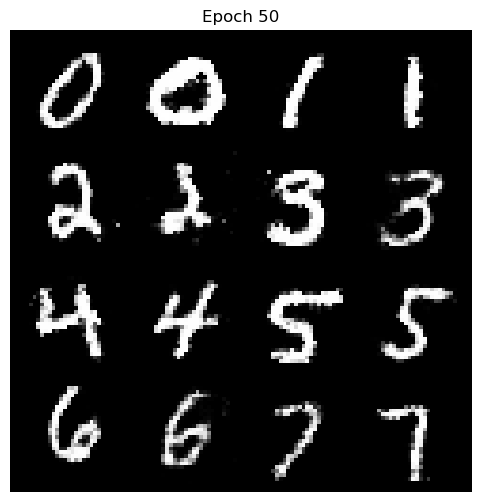

In [ ]:
for epoch in range(NUM_EPOCHS):
    for i, (real_images, real_labels) in enumerate(dataloader):
        real_images = real_images.to(DEVICE)
        real_labels = real_labels.to(DEVICE)

        batch_size = real_images.size(0)

        valid = torch.ones(batch_size, 1, device=DEVICE)
        fake = torch.zeros(batch_size, 1, device=DEVICE)

        d_optimizer.zero_grad()

        d_real = discriminator(real_images, real_labels)
        loss_real = criterion(d_real, valid)

        z = torch.randn(batch_size, NOISE_DIM, device=DEVICE)
        gen_labels = torch.randint(0, NUM_CLASSES, (batch_size,), device=DEVICE)
        fake_images = generator(z, gen_labels)
        d_fake = discriminator(fake_images.detach(), gen_labels)
        loss_fake = criterion(d_fake, fake)

        d_loss = loss_real + loss_fake
        d_loss.backward()
        d_optimizer.step()

        g_optimizer.zero_grad()
        fake_images = generator(z, gen_labels)
        d_output = discriminator(fake_images, gen_labels)
        g_loss = criterion(d_output, valid)
        g_loss.backward()
        g_optimizer.step()

        if i % 100 == 0:
            print(f"[Epoch {epoch+1}/{NUM_EPOCHS}] [Batch {i+1}/{len(dataloader)}] "
                  f"[D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")


    if (epoch + 1) % 5 == 0 or epoch == 0:
        with torch.no_grad():
            fixed_noise = torch.randn(16, NOISE_DIM, device=DEVICE)
            fixed_labels = torch.tensor([i // 2 for i in range(16)], device=DEVICE) 
            generated_images = generator(fixed_noise, fixed_labels)
            show_images(generated_images, epoch, nrow=4, title=f"Epoch {epoch+1}")

# Домашка (дедлайн 20.06)

отправлять в тг: @anna_getun, если будут вопросы, также можно писать

Задача: модицифировать код с использованием рассмотренных в лекции методов (DCGAN, Conditional GAN, StyleGAN).
- Достаточно использование одной модели на выбор
- Можно использовать другие датасеты на выбор
- Увеличить параметры (Epoch, batch) для улучшения качества картинок (**обязательно**)

**Пример**

- DCGAN - поиграться со слоями в генераторе

- Сonditional GAN - создать функцию для генерации изображений заданного(-ых) класса(-ов)

- StyleGAN  - добавление шума на всех слоях, модификация генератора и дискриминатора


*не обязательно использовать данный код, можно создать свою собственную модель GAN и модифицировать её

